In [3]:

import pandas as pd
import numpy as np
pd.set_option("display.max_colwidth", 400)
pd.set_option('display.max_columns', 50)
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.display.float_format = '{:.6f}'.format

index                 431
address               431
valid_stamps_count    431
stamp_providers       431
issuance_date         110
dtype: int64

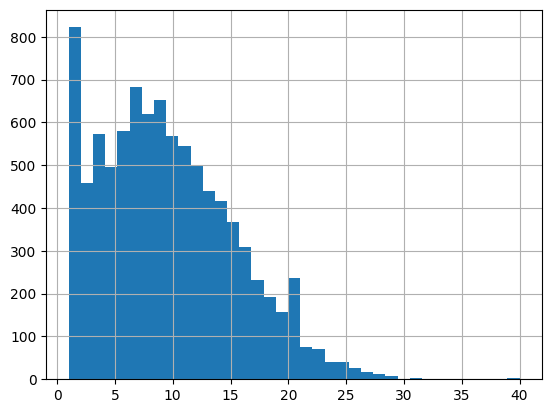

In [5]:
passport_address = pd.read_csv('./passport/output.csv')
passport_address.head()
#passport_address.info()

passport_holder =  passport_address[passport_address['valid_stamps_count'] != 0.0]

passport_address.describe()

passport_holder['valid_stamps_count'].hist(bins=37)

passport_holder[passport_holder['valid_stamps_count'] == 1.0].count()

In [6]:
contributions = pd.read_csv('./analytics_data/combined_contributions.csv')

contributions_passport = pd.merge(contributions, passport_address, left_on='source_wallet', right_on='address', how='left').drop(columns='address')
contributions_passport.head()

,round,id,source_wallet,destination_wallet,amount_usd,token_symbol,index,valid_stamps_count,stamp_providers,issuance_date
0,fantom,113dRUPwQJ9tTfeqeMRq2Mn8kfYrNyakTPdEhqFkVSe,0x06cd8288dc001024ce0a1cf39caaedc0e2db9c82,0xe126b3e5d052f1f575828f61feba4f4f2603652a,0.210000,FTM,0.000000,0.000000,NaN,NaN
1,fantom,113dRUPwQJ9tTfeqeMRq2Mn8kfYrNyakTPdEhqFkVSe,0x06cd8288dc001024ce0a1cf39caaedc0e2db9c82,0xe126b3e5d052f1f575828f61feba4f4f2603652a,0.210000,FTM,17175.000000,0.000000,NaN,NaN
2,fantom,11n4hU8NKy7gr5oBqJ1AeEyBKV7L47JGLpbrskoDBcf,0x9be7d88cfd6e4b519cd9720db6de6e6f2c1ca77e,0x7d658841f8ba93299970f6e765c2ce205f1e70dd,1.029000,FTM,1.000000,0.000000,NaN,NaN
3,fantom,11n4hU8NKy7gr5oBqJ1AeEyBKV7L47JGLpbrskoDBcf,0x9be7d88cfd6e4b519cd9720db6de6e6f2c1ca77e,0x7d658841f8ba93299970f6e765c2ce205f1e70dd,1.029000,FTM,24611.000000,0.000000,NaN,NaN
4,fantom,121GYrfeHauo1PYZFjgWgdAAJnFL8JGNkSauUM8XysS3,0xf8bde71eb161bd83da88bd3a1003eef9ba0c7485,0x9a8568782896c4d4153b8b4d7e440e84e2c2cfbb,0.210000,FTM,2.000000,19.000000,"[""SnapshotVotesProvider"",""Lens"",""Ens"",""gtcPossessionsGte#10"",""GnosisSafe"",""ZkSync"",""NFT"",""FirstEthTxnProvider"",""EthGTEOneTxnProvider"",""Linkedin"",""Discord"",""POAP"",""Facebook"",""FacebookProfilePicture"",""Github"",""Google"",""Twitter"",""TwitterTweetGT10"",""TwitterFollowerGT100""]",NaN


In [11]:
holders_contributions = contributions_passport[(contributions_passport['valid_stamps_count'] != 0.0) & (contributions_passport['round'] != 'gr15')]
holders_contributions
# 102704

# non_holders_contributions = contributions_passport[(contributions_passport['valid_stamps_count'] == 0.0) & (contributions_passport['round'] != 'gr15')]
# non_holders_contributions 
#244213

,round,id,source_wallet,destination_wallet,amount_usd,token_symbol,index,valid_stamps_count,stamp_providers,issuance_date
4,fantom,121GYrfeHauo1PYZFjgWgdAAJnFL8JGNkSauUM8XysS3,0xf8bde71eb161bd83da88bd3a1003eef9ba0c7485,0x9a8568782896c4d4153b8b4d7e440e84e2c2cfbb,0.210000,FTM,2.000000,19.000000,"[""SnapshotVotesProvider"",""Lens"",""Ens"",""gtcPossessionsGte#10"",""GnosisSafe"",""ZkSync"",""NFT"",""FirstEthTxnProvider"",""EthGTEOneTxnProvider"",""Linkedin"",""Discord"",""POAP"",""Facebook"",""FacebookProfilePicture"",""Github"",""Google"",""Twitter"",""TwitterTweetGT10"",""TwitterFollowerGT100""]",NaN
5,fantom,121GYrfeHauo1PYZFjgWgdAAJnFL8JGNkSauUM8XysS3,0xf8bde71eb161bd83da88bd3a1003eef9ba0c7485,0x9a8568782896c4d4153b8b4d7e440e84e2c2cfbb,0.210000,FTM,23310.000000,19.000000,"[""SnapshotVotesProvider"",""Lens"",""Ens"",""gtcPossessionsGte#10"",""GnosisSafe"",""ZkSync"",""NFT"",""FirstEthTxnProvider"",""EthGTEOneTxnProvider"",""Linkedin"",""Discord"",""POAP"",""Facebook"",""FacebookProfilePicture"",""Github"",""Google"",""Twitter"",""TwitterTweetGT10"",""TwitterFollowerGT100""]",NaN
8,fantom,122jc868KSeMmaMezGebsLd9LMhRk1QgMVLj1z2yY3LS,0x13ef1086cdfecc00e0f8f3b2ac2c600f297dc333,0x7ea6b8906a0b33cbdb9582d31364f522395eb0ea,0.597303,FTM,4.000000,9.000000,"[""Google"",""Github"",""POAP"",""Discord"",""SnapshotVotesProvider"",""NFT"",""ZkSync"",""FirstEthTxnProvider"",""EthGTEOneTxnProvider""]",NaN
9,fantom,122jc868KSeMmaMezGebsLd9LMhRk1QgMVLj1z2yY3LS,0x13ef1086cdfecc00e0f8f3b2ac2c600f297dc333,0x7ea6b8906a0b33cbdb9582d31364f522395eb0ea,0.597303,FTM,16380.000000,9.000000,"[""Google"",""Github"",""POAP"",""Discord"",""SnapshotVotesProvider"",""NFT"",""ZkSync"",""FirstEthTxnProvider"",""EthGTEOneTxnProvider""]",NaN
20,fantom,124GU8XNwz31eZRedF9c2rk42e4ciL7dsNMyz2YFyAYE,0xc6d4a1faaefb4d2661f3d235995f1b78b46bf9de,0x06917efce692cad37a77a50b9beef6f4cdd36422,1.050000,FTM,10.000000,17.000000,"[""Google"",""Github"",""Facebook"",""FacebookProfilePicture"",""POAP"",""Discord"",""SnapshotVotesProvider"",""NFT"",""Lens"",""Linkedin"",""Ens"",""FirstEthTxnProvider"",""EthGTEOneTxnProvider"",""gtcPossessionsGte#10"",""Twitter"",""TwitterTweetGT10"",""Brightid""]",NaN
...,...,...,...,...,...,...,...,...,...,...
346908,unicef,ZyeeNyEyf2DtzhHW2zGNRzspKvUfBw5ES47mPq2ygoT,0xa944e92483ddc42e70358760d4a5276be8e82767,0x6078c8eeb7ed8916a8f1e85dc8f6e780c09a89ff,0.120000,ETH,18918.000000,7.000000,"[""Twitter"",""TwitterTweetGT10"",""TwitterFollowerGT100"",""POAP"",""ZkSync"",""FirstEthTxnProvider"",""EthGTEOneTxnProvider""]",NaN
346913,unicef,ZzpcqAFmmUdJ98fp9W27ZWBrBw5DLQWffBHjLL8PrtT,0x95f3955648d5dca694880cef87df9f368ef78728,0x6078c8eeb7ed8916a8f1e85dc8f6e780c09a89ff,0.480000,ETH,490.000000,11.000000,"[""Twitter"",""TwitterTweetGT10"",""SnapshotVotesProvider"",""Discord"",""Github"",""FirstEthTxnProvider"",""EthGTEOneTxnProvider"",""ZkSync"",""NFT"",""Google"",""Ens""]",NaN
346914,unicef,ZzpcqAFmmUdJ98fp9W27ZWBrBw5DLQWffBHjLL8PrtT,0x95f3955648d5dca694880cef87df9f368ef78728,0x6078c8eeb7ed8916a8f1e85dc8f6e780c09a89ff,0.480000,ETH,18423.000000,11.000000,"[""Twitter"",""TwitterTweetGT10"",""SnapshotVotesProvider"",""Discord"",""Github"",""FirstEthTxnProvider"",""EthGTEOneTxnProvider"",""ZkSync"",""NFT"",""Google"",""Ens""]",NaN
346915,unicef,zzsBJ27jNaqPQJz6DsaKSPEKzhciTGLiMqgKUTyzK3m,0x757056e3ab3c65c6c8c710f7e6f9a8327cc6bae7,0x2906e0181f371b7a4c4bffe13e31b2a917b368e8,1.000000,DAI,10626.000000,5.000000,"[""NFT"",""Lens"",""Linkedin"",""Github"",""Google""]",NaN


In [31]:
gr15_grants = pd.read_csv('./analytics_data/grants_stamps_gr15.csv')
gr15_grants.describe()
gr15_grants.rename(columns={'contributor_count_in_round': 'contributor_count'}, inplace=True)
gr15_grants.rename(columns={'grant_id': 'destination_wallet'}, inplace=True)
gr15_grants = gr15_grants[['holders_ratio', 'amount_per_contributor', 'contributor_count', 'destination_wallet']]
gr15_grants['round'] = 'gr15'
gr15_grants


,holders_ratio,amount_per_contributor,contributor_count,destination_wallet,round
0,0.658228,1.606200,158,7974,gr15
1,0.593023,19.336062,86,7940,gr15
2,0.746154,1.289650,260,7918,gr15
3,0.588235,78.617015,17,7894,gr15
4,0.565217,10.153088,23,7893,gr15
...,...,...,...,...,...
715,0.538462,22.440973,39,40,gr15
716,0.381818,7.221483,55,29,gr15
717,0.487768,12.302975,654,25,gr15
718,0.563174,14.326814,1298,24,gr15


In [14]:
unique_grants = contributions_passport[['round', 'destination_wallet']].drop_duplicates()

by_grants = contributions_passport.groupby('destination_wallet').sum()[['valid_stamps_count']]
# by_grants['round'] = contributions_passport.groupby('destination_wallet')['round']
by_grants['tx_count'] = contributions_passport.groupby('destination_wallet').count()['id']
by_grants['contributor_count'] = contributions_passport.groupby('destination_wallet').count()['source_wallet']
by_grants['stamp_holders_tx'] = contributions_passport[contributions_passport['valid_stamps_count'] != 0.0].groupby('destination_wallet').count()['id']
by_grants['amount_usd_total'] = contributions_passport.groupby('destination_wallet').sum()['amount_usd']
by_grants['holders_ratio'] = by_grants['stamp_holders_tx'] / by_grants['tx_count']
by_grants['amount_per_contributor'] = by_grants['amount_usd_total'] / by_grants['contributor_count']
by_grants = pd.merge(by_grants, unique_grants, on='destination_wallet')
by_grants = by_grants[by_grants['tx_count'] > 10]



# # by_grants.info()

# by_grants[by_grants['round'] == 'gr15'].head()
# by_grants.sort_values('holders_ratio').head(10)

/var/folders/gl/3nbwj5r1183_gfp3xql0hclr0000gn/T/ipykernel_64413/3968143884.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_grants = contributions_passport.groupby('destination_wallet').sum()[['valid_stamps_count']]
/var/folders/gl/3nbwj5r1183_gfp3xql0hclr0000gn/T/ipykernel_64413/3968143884.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_grants['amount_usd_total'] = contributions_passport.groupby('destination_wallet').sum()['amount_usd']


In [ ]:
by_grants[by_grants['round'] == 'fantom']['holders_ratio'].hist()
by_grants[by_grants['round'] == 'unicef']['holders_ratio'].hist()

In [41]:
fantom_unicef = by_grants[(by_grants['round'] == 'fantom') | (by_grants['round'] == 'unicef')]
fantom_unicef = fantom_unicef[['round', 'holders_ratio', 'amount_per_contributor', 'destination_wallet', 'contributor_count']]
combined = pd.concat([fantom_unicef, gr15_grants], ignore_index=True)

fantom = by_grants[by_grants['round'] == 'fantom']
fantom_sorted = fantom.sort_values('holders_ratio')
fantom_low = fantom_sorted.head(29)
fantom_low.head()

fantom_high = fantom_sorted.tail(29)
fantom_high.head()

fantom_normal = fantom_sorted.iloc[29:-29]
fantom_normal.head()
fantom_by_ratio = pd.concat([fantom_normal, fantom_high, fantom_low], keys=['normal', 'high', 'low'])
fantom_by_ratio.reset_index(inplace=True)
fantom_by_ratio.rename(columns={'level_0': 'holders_ratio_category'}, inplace = True)
fantom_by_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   holders_ratio_category  88 non-null     object 
 1   level_1                 88 non-null     int64  
 2   destination_wallet      88 non-null     object 
 3   valid_stamps_count      88 non-null     float64
 4   tx_count                88 non-null     int64  
 5   contributor_count       88 non-null     int64  
 6   stamp_holders_tx        88 non-null     float64
 7   amount_usd_total        88 non-null     float64
 8   holders_ratio           88 non-null     float64
 9   amount_per_contributor  88 non-null     float64
 10  round                   88 non-null     object 
dtypes: float64(5), int64(3), object(3)
memory usage: 7.7+ KB


In [53]:
fig = px.scatter(fantom_by_ratio,
    x='contributor_count', y='amount_per_contributor',
    color="holders_ratio_category"
    ,title='Scatter plots of Fantom grants')

fig.show()

In [ ]:
fantom_unicef.corr()
gr15 = by_grants[by_grants['round'] == 'gr15']
gr15.corr()

In [52]:
fig = px.scatter(combined,
    x='holders_ratio', y='amount_per_contributor',
    color="round"
    ,title='Scatter plots of grants by round')

fig.show()

In [50]:
contributors_hist = px.histogram(fantom_by_ratio, x="amount_per_contributor", color="holders_ratio_category",
                   marginal="box", # or violin, rug
                   title='Histgram of amount_per_contributor of Fantom grants'
                   )
contributors_hist.show()

In [54]:
contributors_hist = px.histogram(fantom_by_ratio, x="contributor_count", color="holders_ratio_category",
                   marginal="box", # or violin, rug
                   title='Histgram of number of contributions of Fantom grants'
                   )
contributors_hist.show()

In [26]:

contributors_hist = px.histogram(by_grants, x="amount_per_contributor", color="round",
                   marginal="box", # or violin, rug
                   title='amount_per_contributor'
                   )
contributors_hist.show()

In [49]:
contributors_hist = px.histogram(combined, x="holders_ratio", color="round",
                   marginal="box", # or violin, rug
                   title='Histgram of stamp holders ratio'
                   )
contributors_hist.show()